In [2]:
from keras.datasets import reuters

In [4]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000)

In [5]:
x_train.shape

(8982,)

In [6]:
y_train.shape

(8982,)

In [7]:
import numpy as np

In [10]:
def vectorization(data : any, dim : int = 10000):
    res = np.zeros(shape = (len(data), dim))
    for i in range(len(data)):
        for j in data[i]:
            res[i][j] = 1
    return res

In [11]:
train_data = vectorization(x_train)

In [12]:
train_data.shape

(8982, 10000)

In [13]:
from keras.utils import to_categorical

In [14]:
train_labels = to_categorical(y_train)

In [15]:
test_labels = to_categorical(y_test)

In [16]:
train_labels.shape

(8982, 46)

In [18]:
from keras import layers, models

In [20]:
network = models.Sequential()
network.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'softmax'))

In [21]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [22]:
network.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['acc']
)

In [23]:
len(train_data)

8982

In [26]:
val_data = train_data[:1000]
val_labels = train_labels[:1000]

In [27]:
train_data = train_data[1000:]
train_labels = train_labels[1000:]

In [28]:
hist = network.fit(train_data, train_labels, batch_size = 128, validation_data = (val_data, val_labels), epochs = 20)

2024-06-08 14:00:00.799432: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 319280000 exceeds 10% of free system memory.


Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 1.8267 - acc: 0.6259 - val_loss: 1.2209 - val_acc: 0.7060
Epoch 2/20
 1/63 [..............................] - ETA: 0s - loss: 0.7204 - acc: 0.8438

2024-06-08 14:00:02.962099: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40000000 exceeds 10% of free system memory.


63/63 [==============================] - 1s 13ms/step - loss: 0.9620 - acc: 0.7876 - val_loss: 1.0109 - val_acc: 0.7820
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 0.6557 - acc: 0.8566 - val_loss: 0.9102 - val_acc: 0.8040
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 0.4578 - acc: 0.9024 - val_loss: 0.9303 - val_acc: 0.8000
Epoch 5/20
63/63 [==============================] - 1s 12ms/step - loss: 0.3338 - acc: 0.9256 - val_loss: 0.8787 - val_acc: 0.8300
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 0.2541 - acc: 0.9404 - val_loss: 0.9375 - val_acc: 0.8070
Epoch 7/20
63/63 [==============================] - 1s 13ms/step - loss: 0.2091 - acc: 0.9468 - val_loss: 0.9730 - val_acc: 0.8120
Epoch 8/20
63/63 [==============================] - 1s 12ms/step - loss: 0.1789 - acc: 0.9520 - val_loss: 0.9673 - val_acc: 0.8190
Epoch 9/20
63/63 [==============================] - 1s 12ms/step - loss: 0.1631 - acc: 0.9544 

In [29]:
history = hist.history

In [30]:
import matplotlib.pyplot as plt

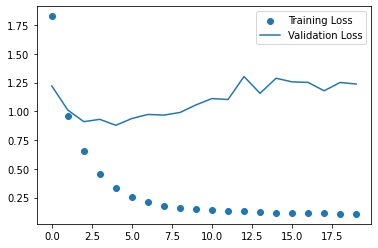

In [32]:
plt.scatter(range(len(history['loss'])), history['loss'], label = 'Training Loss')
plt.plot(range(len(history['val_loss'])), history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'best')
plt.show()

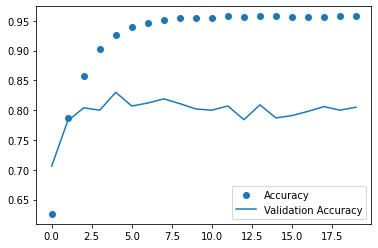

In [33]:
plt.scatter(range(len(history['acc'])), history['acc'], label = 'Accuracy')
plt.plot(range(len(history['val_acc'])), history['val_acc'], label = 'Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

In [36]:
test_data = vectorization(x_test)

In [37]:
result = network.evaluate(test_data, test_labels)

53/71 [=====================>........] - ETA: 0s - loss: 1.4927 - acc: 0.7877

2024-06-08 14:16:37.060108: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89840000 exceeds 10% of free system memory.


71/71 [==============================] - 0s 2ms/step - loss: 1.5336 - acc: 0.7818


In [38]:
result

[1.5336086750030518, 0.7818343639373779]

In [40]:
predications = network.predict(test_data)

29/71 [===========>..................] - ETA: 0s

2024-06-08 14:19:55.603863: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89840000 exceeds 10% of free system memory.


71/71 [==============================] - 0s 2ms/step


In [42]:
c = np.argmax(predications[0])

In [43]:
c

3

In [44]:
r = np.argmax(test_labels[0])

In [45]:
r

3